In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
pd.set_option('display.expand_frame_repr', False)

In [2]:
# visualize the line plots
def plot_lineplot(xs, ys, title):

    plt.figure(figsize=(20, 7))

    sns.despine()
    sns.set_style('white')
    sns.set_context('paper')

    sns.lineplot(x=xs, y=ys)

    plt.title(f'{title}', **{'fontname': 'monospace'})

    plt.xticks(**{'fontname': 'monospace'})
    plt.yticks(**{'fontname': 'monospace'})

    plt.show()

    return None

# bind it all together and implement linear regression
def linear_regression(X, y, w, w0, num_epochs, learning_rate, terminate_on_plateau=False, plateau_counter_limit=100, error_difference_delta=0.01):

    loss_history, plateau_counter = [], 0

    for epoch in range(num_epochs):

        # hypothesis - linear regression
        y_hat = np.dot(X, w) + w0

        # computing loss
        loss_history.append(np.sqrt(np.sum((y - y_hat) ** 2)) / X.shape[0])

        # computing gradients
        grad_w = -2 * np.dot(y - y_hat, X) / X.shape[0]

        # updating weights using the computed gradient values
        w0 += learning_rate
        w -= learning_rate * grad_w

        # checking reduction in rmse over past epochs. if no significant change observe, terminating the process
        if terminate_on_plateau and epoch > 2 and abs(loss_history[-1] - loss_history[-2]) <= error_difference_delta:
            plateau_counter += 1
            if plateau_counter >= plateau_counter_limit:
                print(f'Interupting training as no significant reduction noticed in loss over last {plateau_counter_limit} epochs.')
                return w, w0, y_hat, loss_history

    return w, w0, y_hat, loss_history

   selling_price      year  km_driven   mileage    engine  max_power       age      make     model  Individual  Trustmark Dealer    Diesel  Electric       LPG    Petrol    Manual         5        >5
0      -1.111046 -0.801317   1.195828  0.045745 -1.310754  -1.157780  0.801317 -0.433854 -1.125683    1.248892         -0.098382 -0.985275 -0.020095 -0.056917  1.024622  0.495818  0.444503 -0.424728
1      -0.223944  0.450030  -0.737872 -0.140402 -0.537456  -0.360203 -0.450030 -0.327501 -0.333227    1.248892         -0.098382 -0.985275 -0.020095 -0.056917  1.024622  0.495818  0.444503 -0.424728
2      -0.915058 -1.426990   0.035608 -0.582501 -0.537456  -0.404885  1.426990 -0.327501 -0.789807    1.248892         -0.098382 -0.985275 -0.020095 -0.056917  1.024622  0.495818  0.444503 -0.424728
3      -0.892365 -0.801317  -0.409143  0.329620 -0.921213  -0.693085  0.801317 -0.433854 -0.905265    1.248892         -0.098382 -0.985275 -0.020095 -0.056917  1.024622  0.495818  0.444503 -0.424728
4    

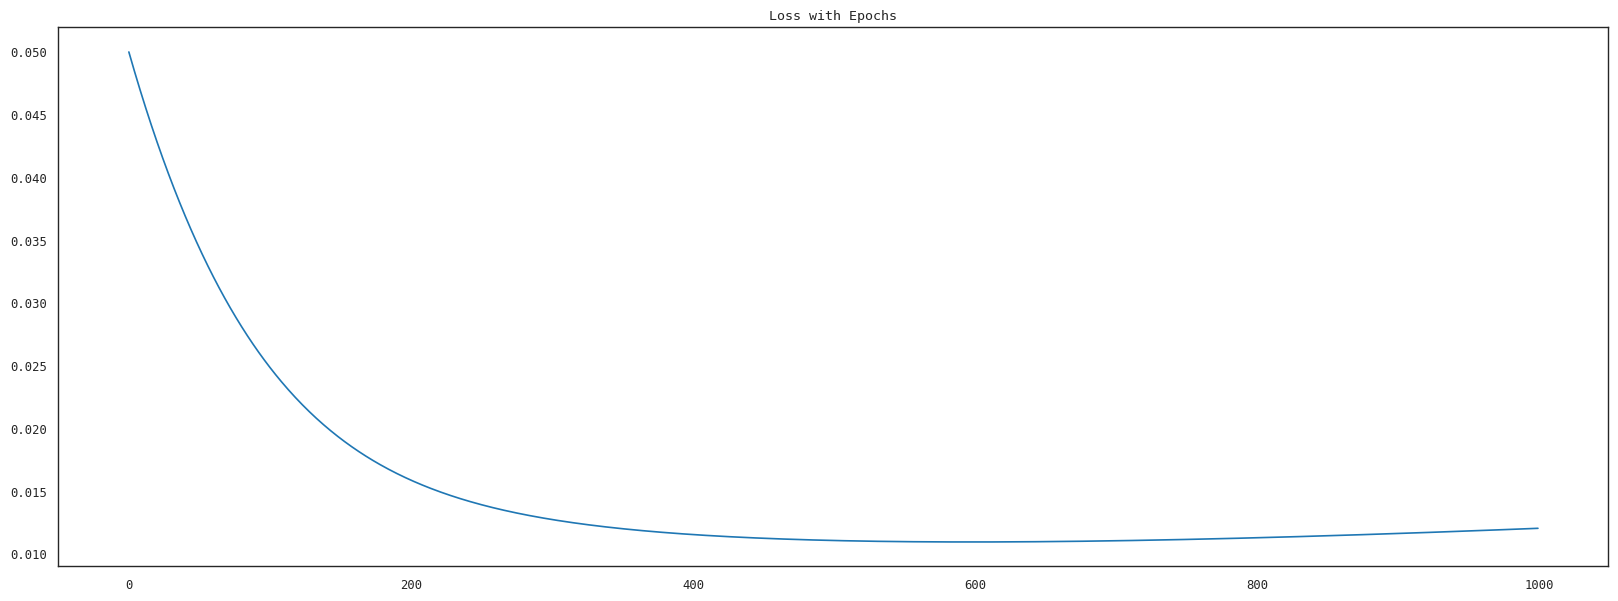

In [3]:
# loading the dataset and f
df = pd.read_csv('cars24_data_clean.csv')
print(df.head())
X = df.drop('selling_price', axis=1).values
y = df['selling_price'].values

w, w0  = np.random.normal(size=(X.shape[1],)), np.random.normal()
# print(f"w: {w}\tw0: {w0}")

# implement linear regression to get optimal weights for a perfect classifier
w, w0, y_hat, loss_history = linear_regression(X=X, y=y, w=w, w0=w0, num_epochs=1000, learning_rate=0.001, terminate_on_plateau=False)
# print(f"\nw_optimal: {w}\tw0_optimal: {w0}")

# plot accuracy and loss - these should plateau with number of epochs
plot_lineplot(np.arange(len(loss_history)), loss_history, 'Loss with Epochs')